In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray
%matplotlib qt

# Centre Voltage Sweep

In [2]:
cen_v= pd.read_csv('./2019-06-29/phi0_daedalus_voltCenter_calib_2019-06-29_2.csv', comment="#")

In [3]:
cen_vn = cen_v[cen_v.Yfield>0]
cen_vp = cen_v[cen_v.Yfield<0]

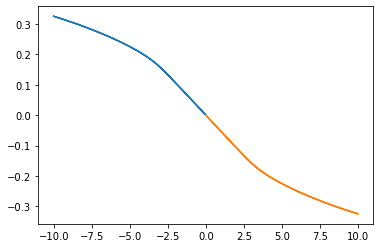

In [4]:
plt.figure()
plt.plot(cen_vn.V.values, cen_vn.Yfield.values)
plt.plot(cen_vp.V.values, cen_vp.Yfield.values)

In [5]:
cen_vp_coeff = np.polyfit(cen_vp.Yfield.values, cen_vp.V.values, 5)
cen_vn_coeff = np.polyfit(cen_vn.Yfield.values, cen_vn.V.values, 5)
cen_v_coeffs = np.asarray([cen_vn_coeff, cen_vp_coeff])
print(cen_v_coeffs)

[[ 4.16168895e+03 -3.11844226e+03  5.47011535e+02 -2.84592899e+01
  -1.86123341e+01  8.26244300e-03]
 [ 4.15146313e+03  3.09829665e+03  5.35103810e+02  2.63857442e+01
  -1.86952107e+01 -1.33786176e-02]]


In [6]:
np.savetxt("./icarusCalibCsv/icarus_volt_center_calib.csv", cen_v_coeffs, delimiter=",")

In [7]:
cen_vp_fit = np.poly1d(cen_vp_coeff)
cen_vn_fit = np.poly1d(cen_vn_coeff)

Text(0.5, 1.0, 'B(V)')

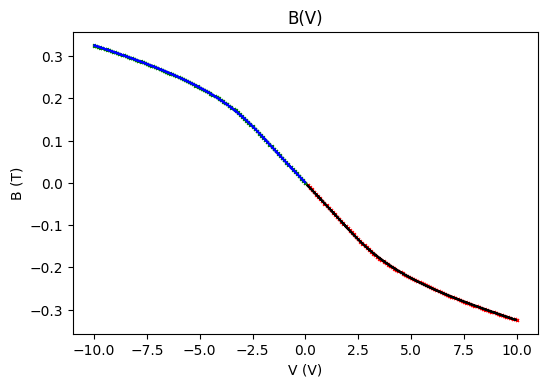

In [8]:
plt.figure(dpi=100)

plt.plot(cen_vp.V, cen_vp.Yfield, 'rx', markersize=2)
plt.plot(cen_vp_fit(cen_vp.Yfield), cen_vp.Yfield , 'k')

plt.plot(cen_vn.V, cen_vn.Yfield, 'gx', markersize=2)
plt.plot(cen_vn_fit(cen_vn.Yfield), cen_vn.Yfield , 'b')
plt.xlabel('V (V)')
plt.ylabel('B (T)')
plt.title('B(V)')

# Radial Calibration 3 V

In [9]:
vp = pd.read_csv('./2019-06-30/3vp_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv', comment='#')
vn = pd.read_csv('./2019-06-30/3vn_daedalus_radialPolar_calib_A000.0_2019-06-30_1.csv', comment='#')

In [10]:
vp = vp.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vp = vp.assign(theta=lambda a: np.arctan2(a.Zfield, -a.Yfield)*180/np.pi)
vp = vp.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

vn = vn.assign(phi=lambda a: np.arctan2(a.Xfield, a.Yfield)*180/np.pi)
vn = vn.assign(theta=lambda a: np.arctan2(a.Zfield, a.Yfield)*180/np.pi)
vn = vn.assign(Bmag=lambda a: np.sqrt(a.Yfield**2 + a.Zfield**2))

In [11]:
vp_dv = {}
vn_dv = {}
for c in vp.columns[:]:
    vp_dv[c] = (["R"],vp[c])
    vn_dv[c] = (["R"],vn[c])
vp_ds = xr.Dataset(vp_dv)
vn_ds = xr.Dataset(vn_dv)

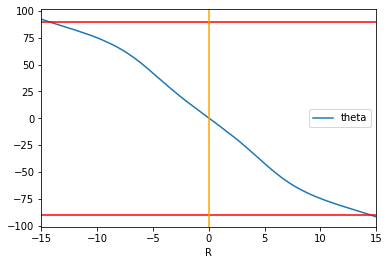

In [12]:
vp.plot('R', 'theta')
plt.axhline(90,color='r')
plt.axhline(-90,color='r')
plt.axvline(0,color='orange')

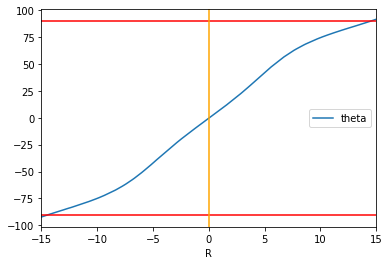

In [13]:
vn.plot('R', 'theta')
plt.axhline(-90,color='r')
plt.axhline(90, color='r')
plt.axvline(0,color='orange')

In [14]:
vp_rp = vp[vp.R>0]
vp_rn = vp[vp.R<0]
vn_rp = vn[vn.R>0]
vn_rn = vn[vn.R<0]

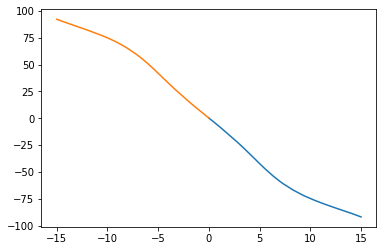

In [15]:
plt.plot(vp_rp.R, vp_rp.theta)
plt.plot(vp_rn.R, vp_rn.theta)

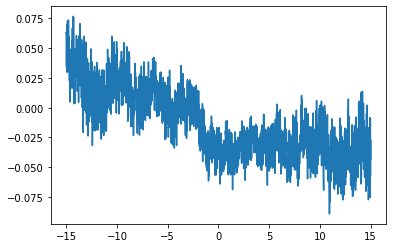

In [16]:
plt.plot(vp.R, (vp.theta+vn.theta))

### Negative voltage R-theta relation

In [31]:
vn_R_thetapos_coeff = np.polyfit(vn_rp.theta, vn_rp.R, 6)
vn_R_thetaneg_coeff = np.polyfit(vn_rn.theta, vn_rn.R, 6)
vn_R_thetapos = np.poly1d(vn_R_thetapos_coeff)
vn_R_thetaneg = np.poly1d(vn_R_thetaneg_coeff)
R_theta = vn_R_thetapos_coeff,vn_R_thetaneg_coeff
print(R_theta)
np.savetxt("./icarusCalibCsv/icarus_3V_radial_polar_calib.csv", R_theta, delimiter=",")

(array([-1.89845134e-10,  4.70718040e-08, -4.11491101e-06,  1.68026210e-04,
       -3.62024366e-03,  1.58183508e-01, -8.17962942e-03]), array([1.80902462e-10, 4.53652884e-08, 4.00916898e-06, 1.64871182e-04,
       3.56303738e-03, 1.60231101e-01, 9.64833515e-02]))


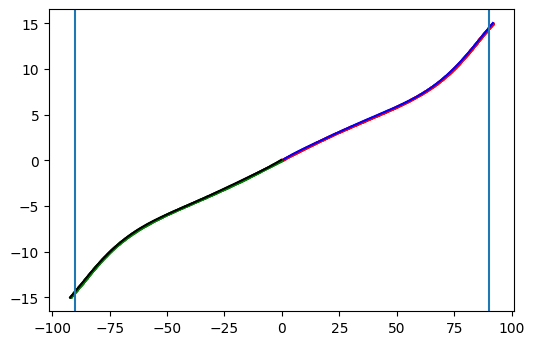

In [18]:
plt.figure(dpi=100)
plt.plot(vn_rp.theta, vn_rp.R, 'r+', markersize=2)
plt.plot(vn_rp.theta, vn_R_thetapos(vn_rp.theta), 'b')
plt.plot(vn_rn.theta, vn_rn.R, 'g+', markersize=2)
plt.plot(vn_rn.theta, vn_R_thetaneg(vn_rn.theta), 'k')
plt.axvline(90)
plt.axvline(-90)

In [19]:
bmag_vp_rp_coeff = np.polyfit(vp[vp.R>0].R, vp[vp.R>0].Bmag, 10)
bmag_vp_rp = np.poly1d(bmag_vp_rp_coeff)

bmag_vp_rn_coeff = np.polyfit(vp[vp.R<0].R, vp[vp.R<0].Bmag, 10)
bmag_vp_rn = np.poly1d(bmag_vp_rn_coeff)

bmag_vn_rp_coeff = np.polyfit(vn[vn.R>0].R, vn[vn.R>0].Bmag, 10)
bmag_vn_rp = np.poly1d(bmag_vn_rp_coeff)

bmag_vn_rn_coeff = np.polyfit(vn[vn.R<0].R, vn[vn.R<0].Bmag, 10)
bmag_vn_rn = np.poly1d(bmag_vn_rn_coeff)

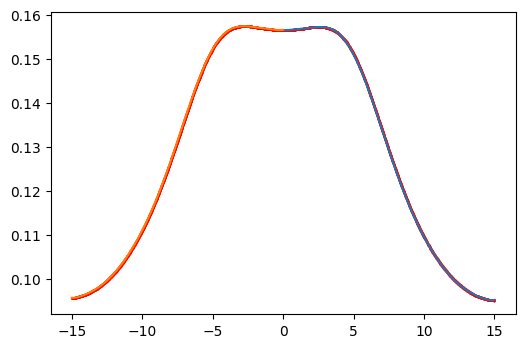

In [20]:
plt.figure(dpi=100)
plt.plot(vp.R, vp.Bmag, 'r+', markersize=2)
plt.plot(vp[vp.R>0].R, bmag_vp_rp(vp[vp.R>0].R))
plt.plot(vp[vp.R<0].R, bmag_vp_rn(vp[vp.R<0].R))

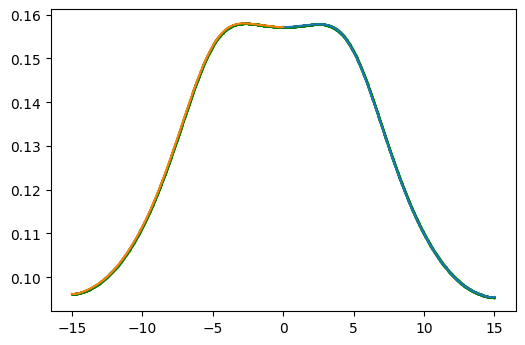

In [21]:
plt.figure(dpi=100)
plt.plot(vn.R, vn.Bmag, 'g+', markersize=2)
plt.plot(vn[vn.R>0].R, bmag_vn_rp(vn[vn.R>0].R))
plt.plot(vn[vn.R<0].R, bmag_vn_rn(vn[vn.R<0].R))

### Voltage Correction function

In [22]:
V0 = cen_vn_fit(bmag_vn_rp(0.0)) # Voltage used for radial scan
Rpts_p = np.arange(0, 15, 0.1)
Rpts_n = np.arange(-15, 0, 0.1)

In [23]:
vcent_vp_rp = -V0/cen_vp_fit(-bmag_vp_rp(Rpts_p))
vcent_vp_rn = -V0/cen_vp_fit(-bmag_vp_rn(Rpts_n))
vcent_vn_rp = V0/cen_vn_fit(bmag_vn_rp(Rpts_p))
vcent_vn_rn = V0/cen_vn_fit(bmag_vn_rn(Rpts_n))

In [24]:
n = 10
vcorr_vp_rp_coeff = np.polyfit(Rpts_p, vcent_vp_rp, n)
vcorr_vp_rp = np.poly1d(vcorr_vp_rp_coeff)
vcorr_vp_rn_coeff = np.polyfit(Rpts_n, vcent_vp_rn, n)
vcorr_vp_rn = np.poly1d(vcorr_vp_rn_coeff)
vcorr_vn_rp_coeff = np.polyfit(Rpts_p, vcent_vn_rp, n)
vcorr_vn_rp = np.poly1d(vcorr_vn_rp_coeff)
vcorr_vn_rn_coeff = np.polyfit(Rpts_n, vcent_vn_rn, n)
vcorr_vn_rn = np.poly1d(vcorr_vn_rn_coeff)

In [25]:
print(vcorr_vn_rp_coeff, '\n', vcorr_vp_rp_coeff, '\n', vcorr_vn_rn_coeff, '\n',vcorr_vp_rn_coeff)

[-6.90570608e-10  5.37116692e-08 -1.76159231e-06  3.14917654e-05
 -3.30487805e-04  2.04190701e-03 -7.18672606e-03  1.46820077e-02
 -1.67912648e-02  6.61611611e-03  9.99683251e-01] 
 [-6.46852265e-10  5.02507596e-08 -1.64566565e-06  2.93443221e-05
 -3.06333524e-04  1.87137669e-03 -6.43502850e-03  1.27179466e-02
 -1.40867372e-02  4.91561201e-03  1.00715321e+00] 
 [-6.71049948e-10 -5.25595963e-08 -1.74263665e-06 -3.16397862e-05
 -3.39217400e-04 -2.15803599e-03 -7.89339702e-03 -1.66906390e-02
 -1.95757048e-02 -7.96323094e-03  9.99437958e-01] 
 [-6.03406166e-10 -4.78272611e-08 -1.60311597e-06 -2.93896016e-05
 -3.17666348e-04 -2.03372242e-03 -7.47872846e-03 -1.59993325e-02
 -1.92407240e-02 -8.10503976e-03  1.00656928e+00]


In [26]:
vcorr_coeffs = [vcorr_vn_rp_coeff, vcorr_vp_rp_coeff, vcorr_vn_rn_coeff,vcorr_vp_rn_coeff]
np.savetxt("./icarusCalibCsv/icarus_3V_volt_correction_calib.csv", vcorr_coeffs, delimiter=",")

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

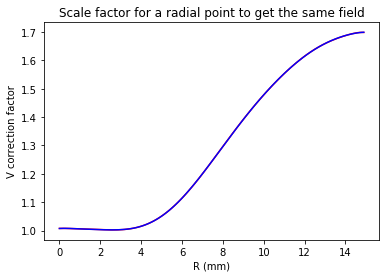

In [27]:
plt.plot(Rpts_p, vcent_vp_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vp_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

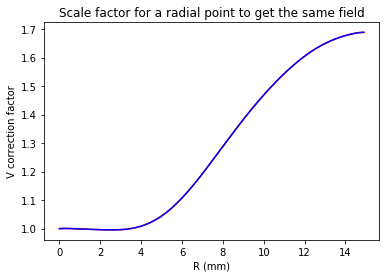

In [28]:
plt.plot(Rpts_p, vcent_vn_rp, 'r', markersize = 2)
plt.plot(Rpts_p, vcorr_vn_rp(Rpts_p), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

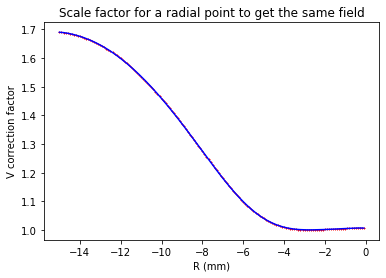

In [29]:
plt.plot(Rpts_n, vcent_vp_rn, 'r+', markersize = 2)
plt.plot(Rpts_n, vcorr_vp_rn(Rpts_n), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')

Text(0.5, 1.0, 'Scale factor for a radial point to get the same field')

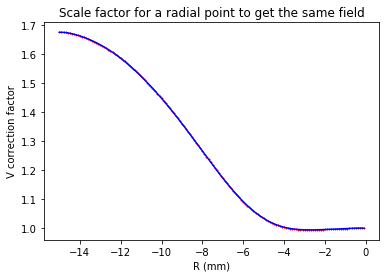

In [30]:
plt.plot(Rpts_n, vcent_vn_rn, 'r+', markersize = 2)
plt.plot(Rpts_n, vcorr_vn_rn(Rpts_n), 'b')
plt.xlabel('R (mm)')
plt.ylabel('V correction factor')
plt.title('Scale factor for a radial point to get the same field')